# Team Project

In [ ]:
# libraries to import
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpltlib
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [ ]:
## read datas

# crime
crime_raw = pd.read_csv("Neighbourhood_Crime_Rates.csv")

# neighbourhood data
neighbourhood_raw = pd.read_csv("neighbourhood-profiles-2016-140-model.csv")


In [ ]:
# keep relevant variables for analysis. since the other csv contains data from 2016, only focus on 2016 data
crime_2016 = crime_raw[['Neighbourhood', 'Assault_2016', 'Assault_Rate2016', 'AutoTheft_2016', 'AutoTheft_Rate2016',
                      'BreakAndEnter_2016', 'BreakAndEnter_Rate2016', 'Robbery_2016', 'Robbery_Rate2016',
                      'TheftOver_2016', 'TheftOver_Rate2016', 'Homicide_2016', 'Homicide_Rate2016',
                      'Shootings_2016', 'Shootings_Rate2016']]

In [ ]:
%%capture --no-display
# David's heat map stuff
tor_map = "Neighbourhoods.shp"
# read .shp file and make a common joining factor
regions = gpd.read_file(tor_map)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '')
# keep coordinates, polygons, and neighbourhood name
regions_cleaned = regions[['FIELD_11', 'FIELD_12', 'geometry', 'neighbourhood']]
regions_cleaned = regions_cleaned.rename(columns={'FIELD_11':'longitute', 'FIELD_12':'latitude'})


In [ ]:
# join crime data and heat map data
crime_regions = regions_cleaned.set_index('neighbourhood').join(crime_2016.set_index('Neighbourhood'))
crime_regions = crime_regions.reset_index()
crime_regions = crime_regions.fillna(0)

# create a total crimes
crime_regions['TotalCrimes_2016'] = crime_regions['Assault_2016']+ \
                            crime_regions['AutoTheft_2016']+ \
                            crime_regions['BreakAndEnter_2016']+ \
                            crime_regions['Robbery_2016']+ \
                            crime_regions['TheftOver_2016']+ \
                            crime_regions['Homicide_2016']+ \
                            crime_regions['Shootings_2016']

# create "property" type crimes variable
crime_regions['PropertyCrimes_2016'] = crime_regions['AutoTheft_2016'] + crime_regions['BreakAndEnter_2016'] + crime_regions['Robbery_2016'] + crime_regions['TheftOver_2016']

# create "violence" type crimes variable
crime_regions['ViolenceCrimes_2016'] = crime_regions['Assault_2016'] + crime_regions['Homicide_2016']+ crime_regions['Shootings_2016']


In [ ]:
# Unpivot the neighbourhood dataframe
neighbourhood = pd.melt(neighbourhood_raw, id_vars=['Category','Topic','Data Source','Characteristic'])

In [ ]:
# cleaning neighbourhood
# remove rows that are not neighbourhood

# remove rows whith variable = '_id'
neighbourhood = neighbourhood.drop(
    neighbourhood[neighbourhood["variable"] == '_id'].index
)

# remove rows whith variable = 'City of Toronto'
neighbourhood = neighbourhood.drop(
    neighbourhood[neighbourhood["variable"] == 'City of Toronto'].index
)

# now in the neighbourhood we have only neighbourhood

In [ ]:
# adjust column names
neighbourhood = neighbourhood.rename(columns={'Category': 'category', 'Topic': 'topic', 'Data Source': 'data_source', 'Characteristic':'characteristic', 'variable': 'neighbourhood'})


In [ ]:
# return a dataframe filtering values from neighbourhood dataframme
def neighbourhoodDataframeValueFiltered(column, filter):
    newDataframe = neighbourhood[['characteristic','neighbourhood','value']].query('characteristic == "'+filter+'"')
    
    # adjust column name
    newDataframe = newDataframe.rename(columns={'value': column})

    # adjust type of column to int
    newDataframe[column] = newDataframe[column].str.replace(',', '')
    newDataframe = newDataframe.astype({column: float})
    newDataframe = newDataframe.drop('characteristic', axis=1)
    
    # return dataFrame 
    return newDataframe

In [ ]:
# dictionary with column name and condition to add from neighbourhood to crime_regions
dict_columns = {}
dict_columns['population'] = 'Population, 2016'
dict_columns['children'] = 'Children (0-14 years)'
dict_columns['youth']='Youth (15-24 years)'
dict_columns['workingAge']='Working Age (25-54 years)'
dict_columns['preRetirement']='Pre-retirement (55-64 years)'
dict_columns['seniors']='Seniors (65+ years)'
dict_columns['olderSeniors']='Older Seniors (85+ years)'
dict_columns['seniors_alone']='Persons age 65+ living alone (total)'
dict_columns['income']='Total income: Average amount ($)'
dict_columns['education']='Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25% sample data'
dict_columns['indigenous']='Total - Aboriginal identity for the population in private households - 25% sample data'
dict_columns['unemployment']='Employment rate'


In [ ]:
# loop to add columns to crime_regions
for column in dict_columns:
    crime_regions = crime_regions.merge(neighbourhoodDataframeValueFiltered(column, dict_columns[column]), left_on='neighbourhood', right_on='neighbourhood')


In [ ]:
crime_regions.head(10)

,neighbourhood,longitute,latitude,geometry,Assault_2016,Assault_Rate2016,AutoTheft_2016,AutoTheft_Rate2016,BreakAndEnter_2016,BreakAndEnter_Rate2016,...,youth,workingAge,preRetirement,seniors,olderSeniors,seniors_alone,income,education,indigenous,unemployment
0,Wychwood,-79.425515,43.676919,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",80.0,540.5771,18.0,121.62980,30.0,202.71640,...,1320.0,6420.0,1595.0,3150.0,880.0,690.0,54460.0,11385.0,13250.0,65.6
1,Yonge-Eglinton,-79.403590,43.704689,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",67.0,547.5646,4.0,32.69042,19.0,155.27950,...,1225.0,5860.0,1325.0,1600.0,165.0,595.0,89330.0,10000.0,11805.0,68.2
2,Yonge-St.Clair,-79.397871,43.687859,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",34.0,262.5482,7.0,54.05405,12.0,92.66409,...,920.0,5960.0,1540.0,2905.0,470.0,1025.0,114174.0,11100.0,12295.0,65.2
3,York University Heights,-79.488883,43.765736,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",363.0,1269.3200,106.0,370.65530,98.0,342.68130,...,4750.0,12290.0,2965.0,3530.0,400.0,720.0,29958.0,23520.0,27565.0,56.3
4,Yorkdale-Glen Park,-79.457108,43.714672,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",175.0,1149.1990,41.0,269.24090,66.0,433.41210,...,1870.0,5860.0,1810.0,3295.0,775.0,610.0,38527.0,12065.0,14030.0,55.3
5,Lambton Baby Point,-79.496045,43.657420,"POLYGON ((-79.50552 43.66281, -79.50577 43.662...",20.0,243.4275,1.0,12.17137,9.0,109.54240,...,905.0,3310.0,1050.0,1025.0,140.0,315.0,76629.0,6285.0,7985.0,61.8
6,Lansing-Westgate,-79.424748,43.754271,"POLYGON ((-79.43998 43.76156, -79.44004 43.761...",67.0,400.6698,26.0,155.48380,41.0,245.18600,...,2105.0,7590.0,1910.0,2160.0,360.0,540.0,72371.0,13650.0,16060.0,62.5
7,Lawrence Park North,-79.403978,43.730060,"POLYGON ((-79.39008 43.72768, -79.39199 43.727...",22.0,146.5397,13.0,86.59162,27.0,179.84410,...,1670.0,5980.0,1725.0,1935.0,265.0,545.0,111730.0,11275.0,14565.0,65.9
8,Lawrence Park South,-79.406039,43.717212,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",19.0,121.7558,20.0,128.16400,44.0,281.96090,...,2095.0,5870.0,2115.0,2235.0,315.0,500.0,169203.0,12270.0,15115.0,63.1
9,Leaside-Bennington,-79.366072,43.703797,"POLYGON ((-79.37749 43.71309, -79.37762 43.713...",38.0,220.0985,4.0,23.16826,33.0,191.13810,...,2175.0,6455.0,2340.0,2550.0,400.0,710.0,125564.0,13365.0,16645.0,63.7


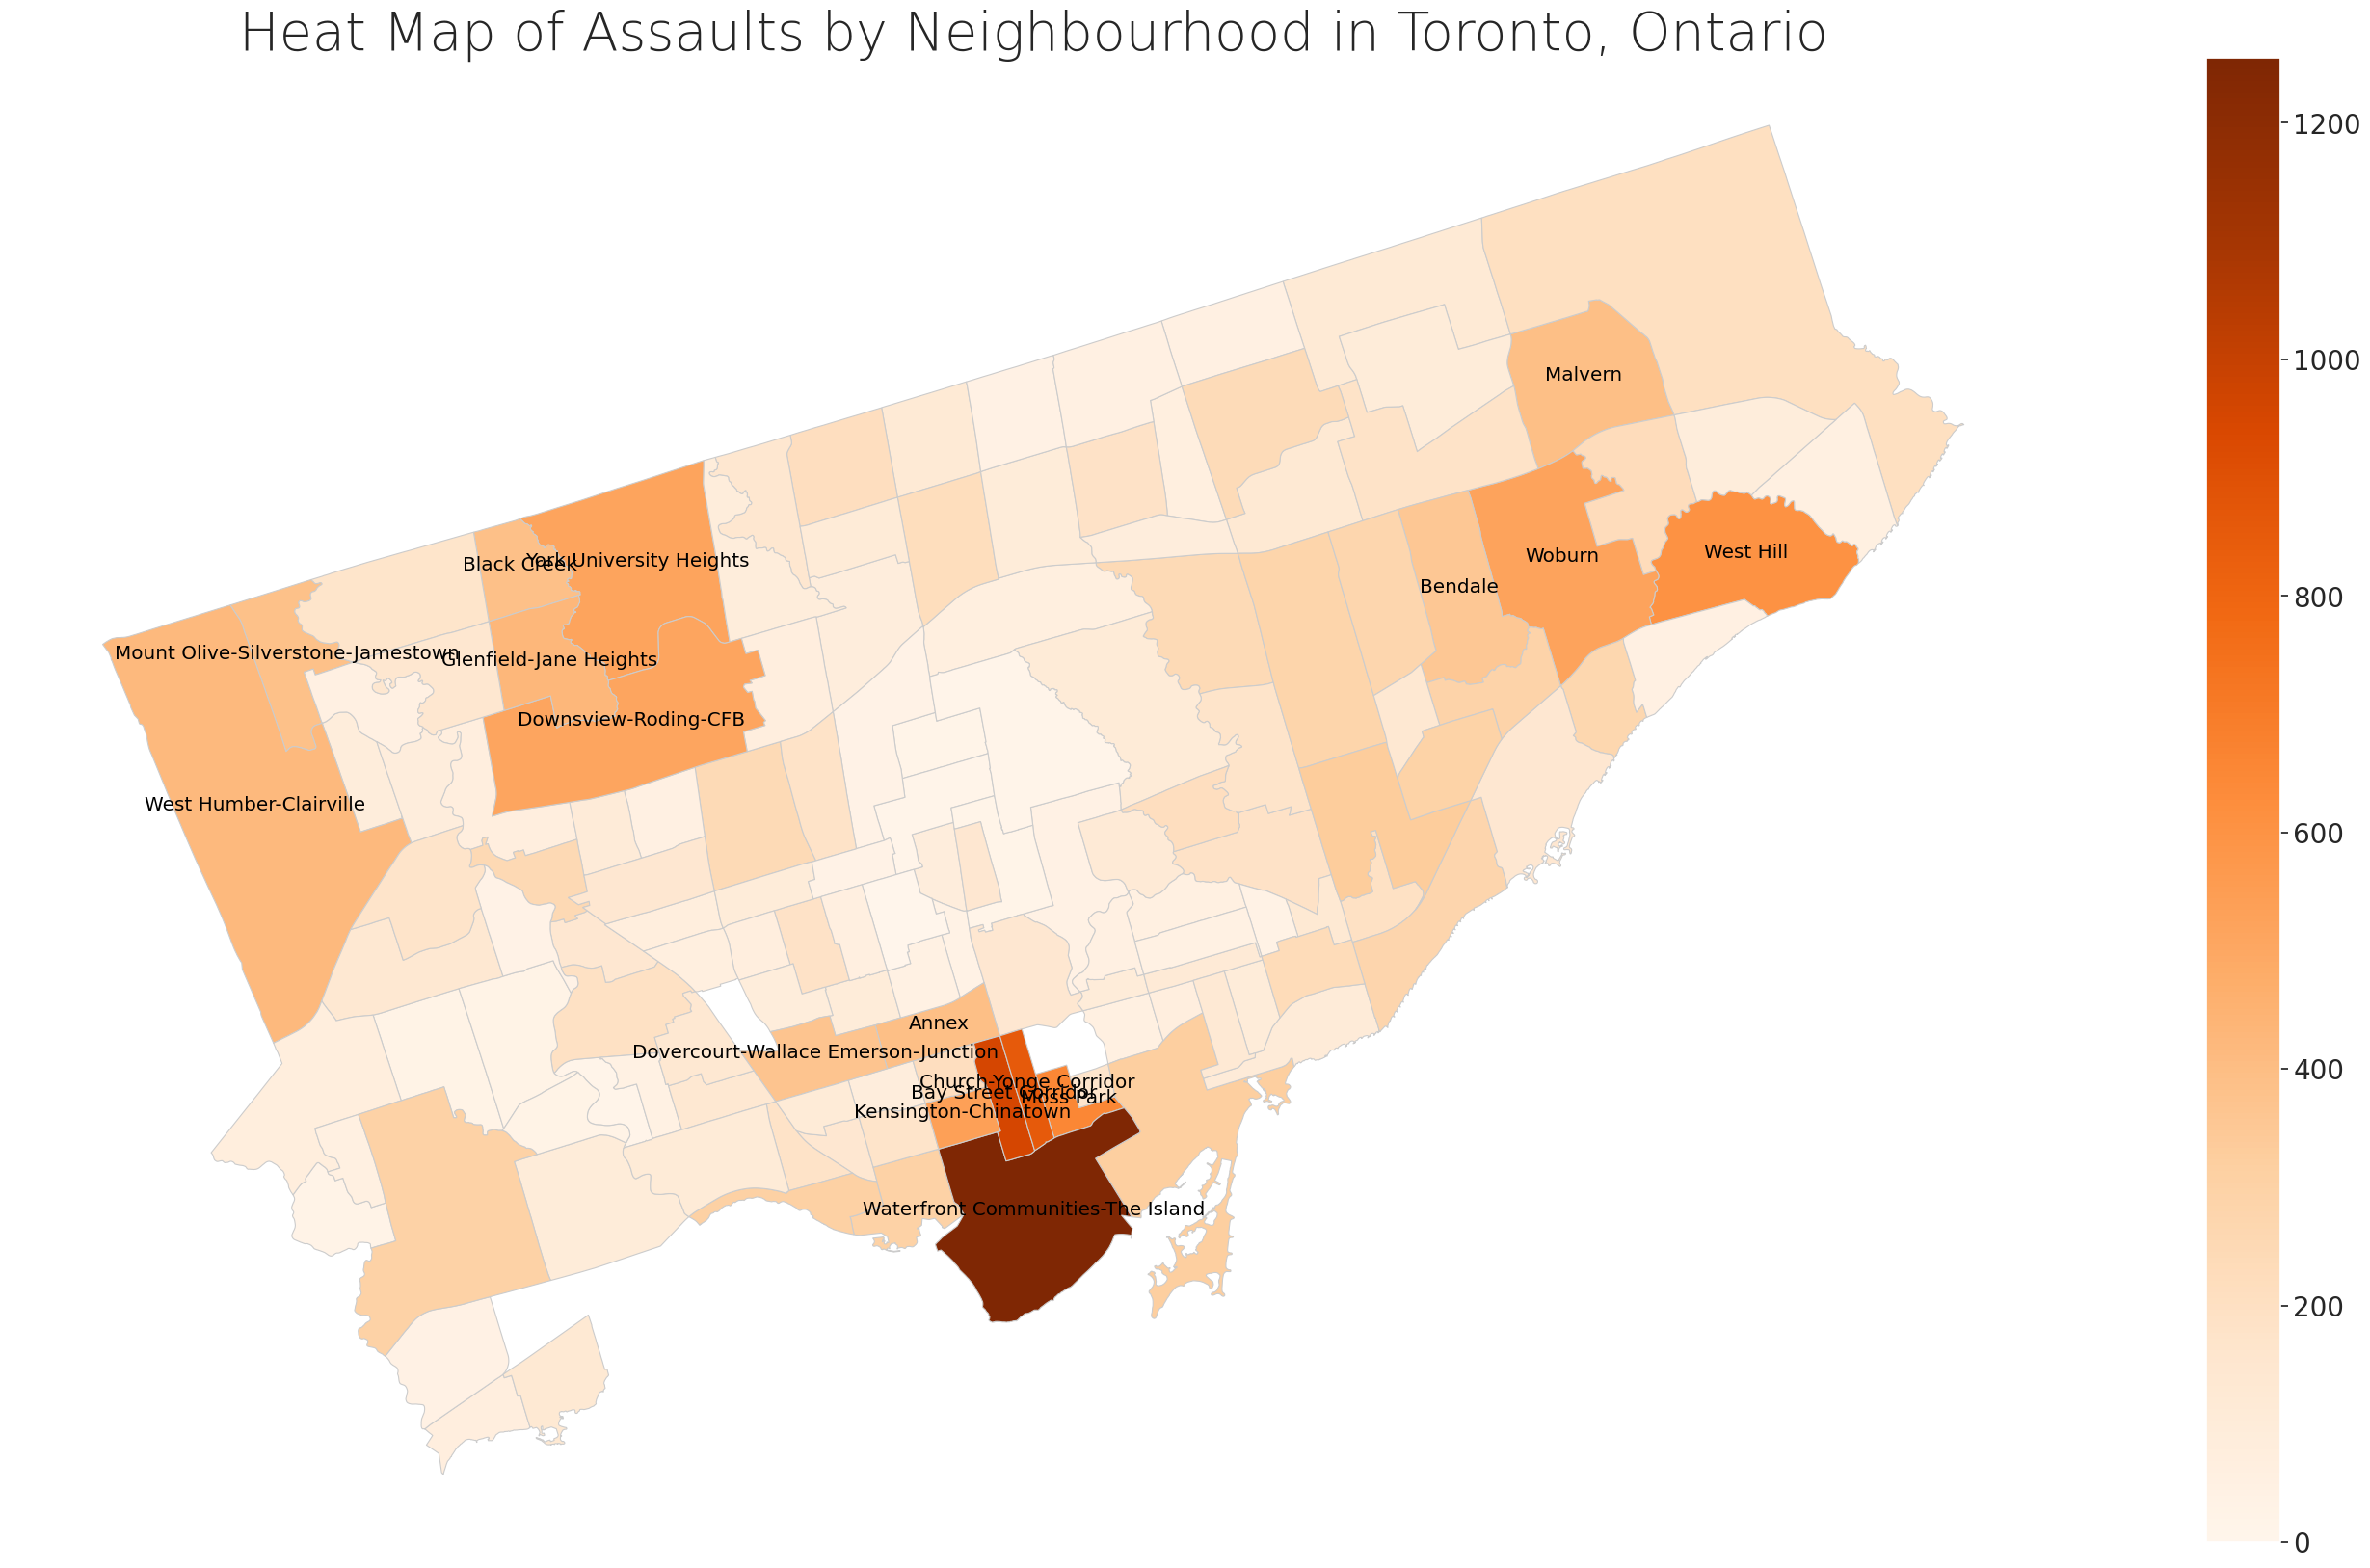

In [ ]:
%%capture --no-display
# Heat Map of Assaults by Neighbourhood in Toronto
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Assaults by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, crime_regions['TotalCrimes_2016'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

crime_regions.plot('Assault_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in crime_regions.iterrows():
    if(row['Assault_2016'] > 250):
        plt.annotate(text=row['neighbourhood'], xy=(row['longitute'], row['latitude']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

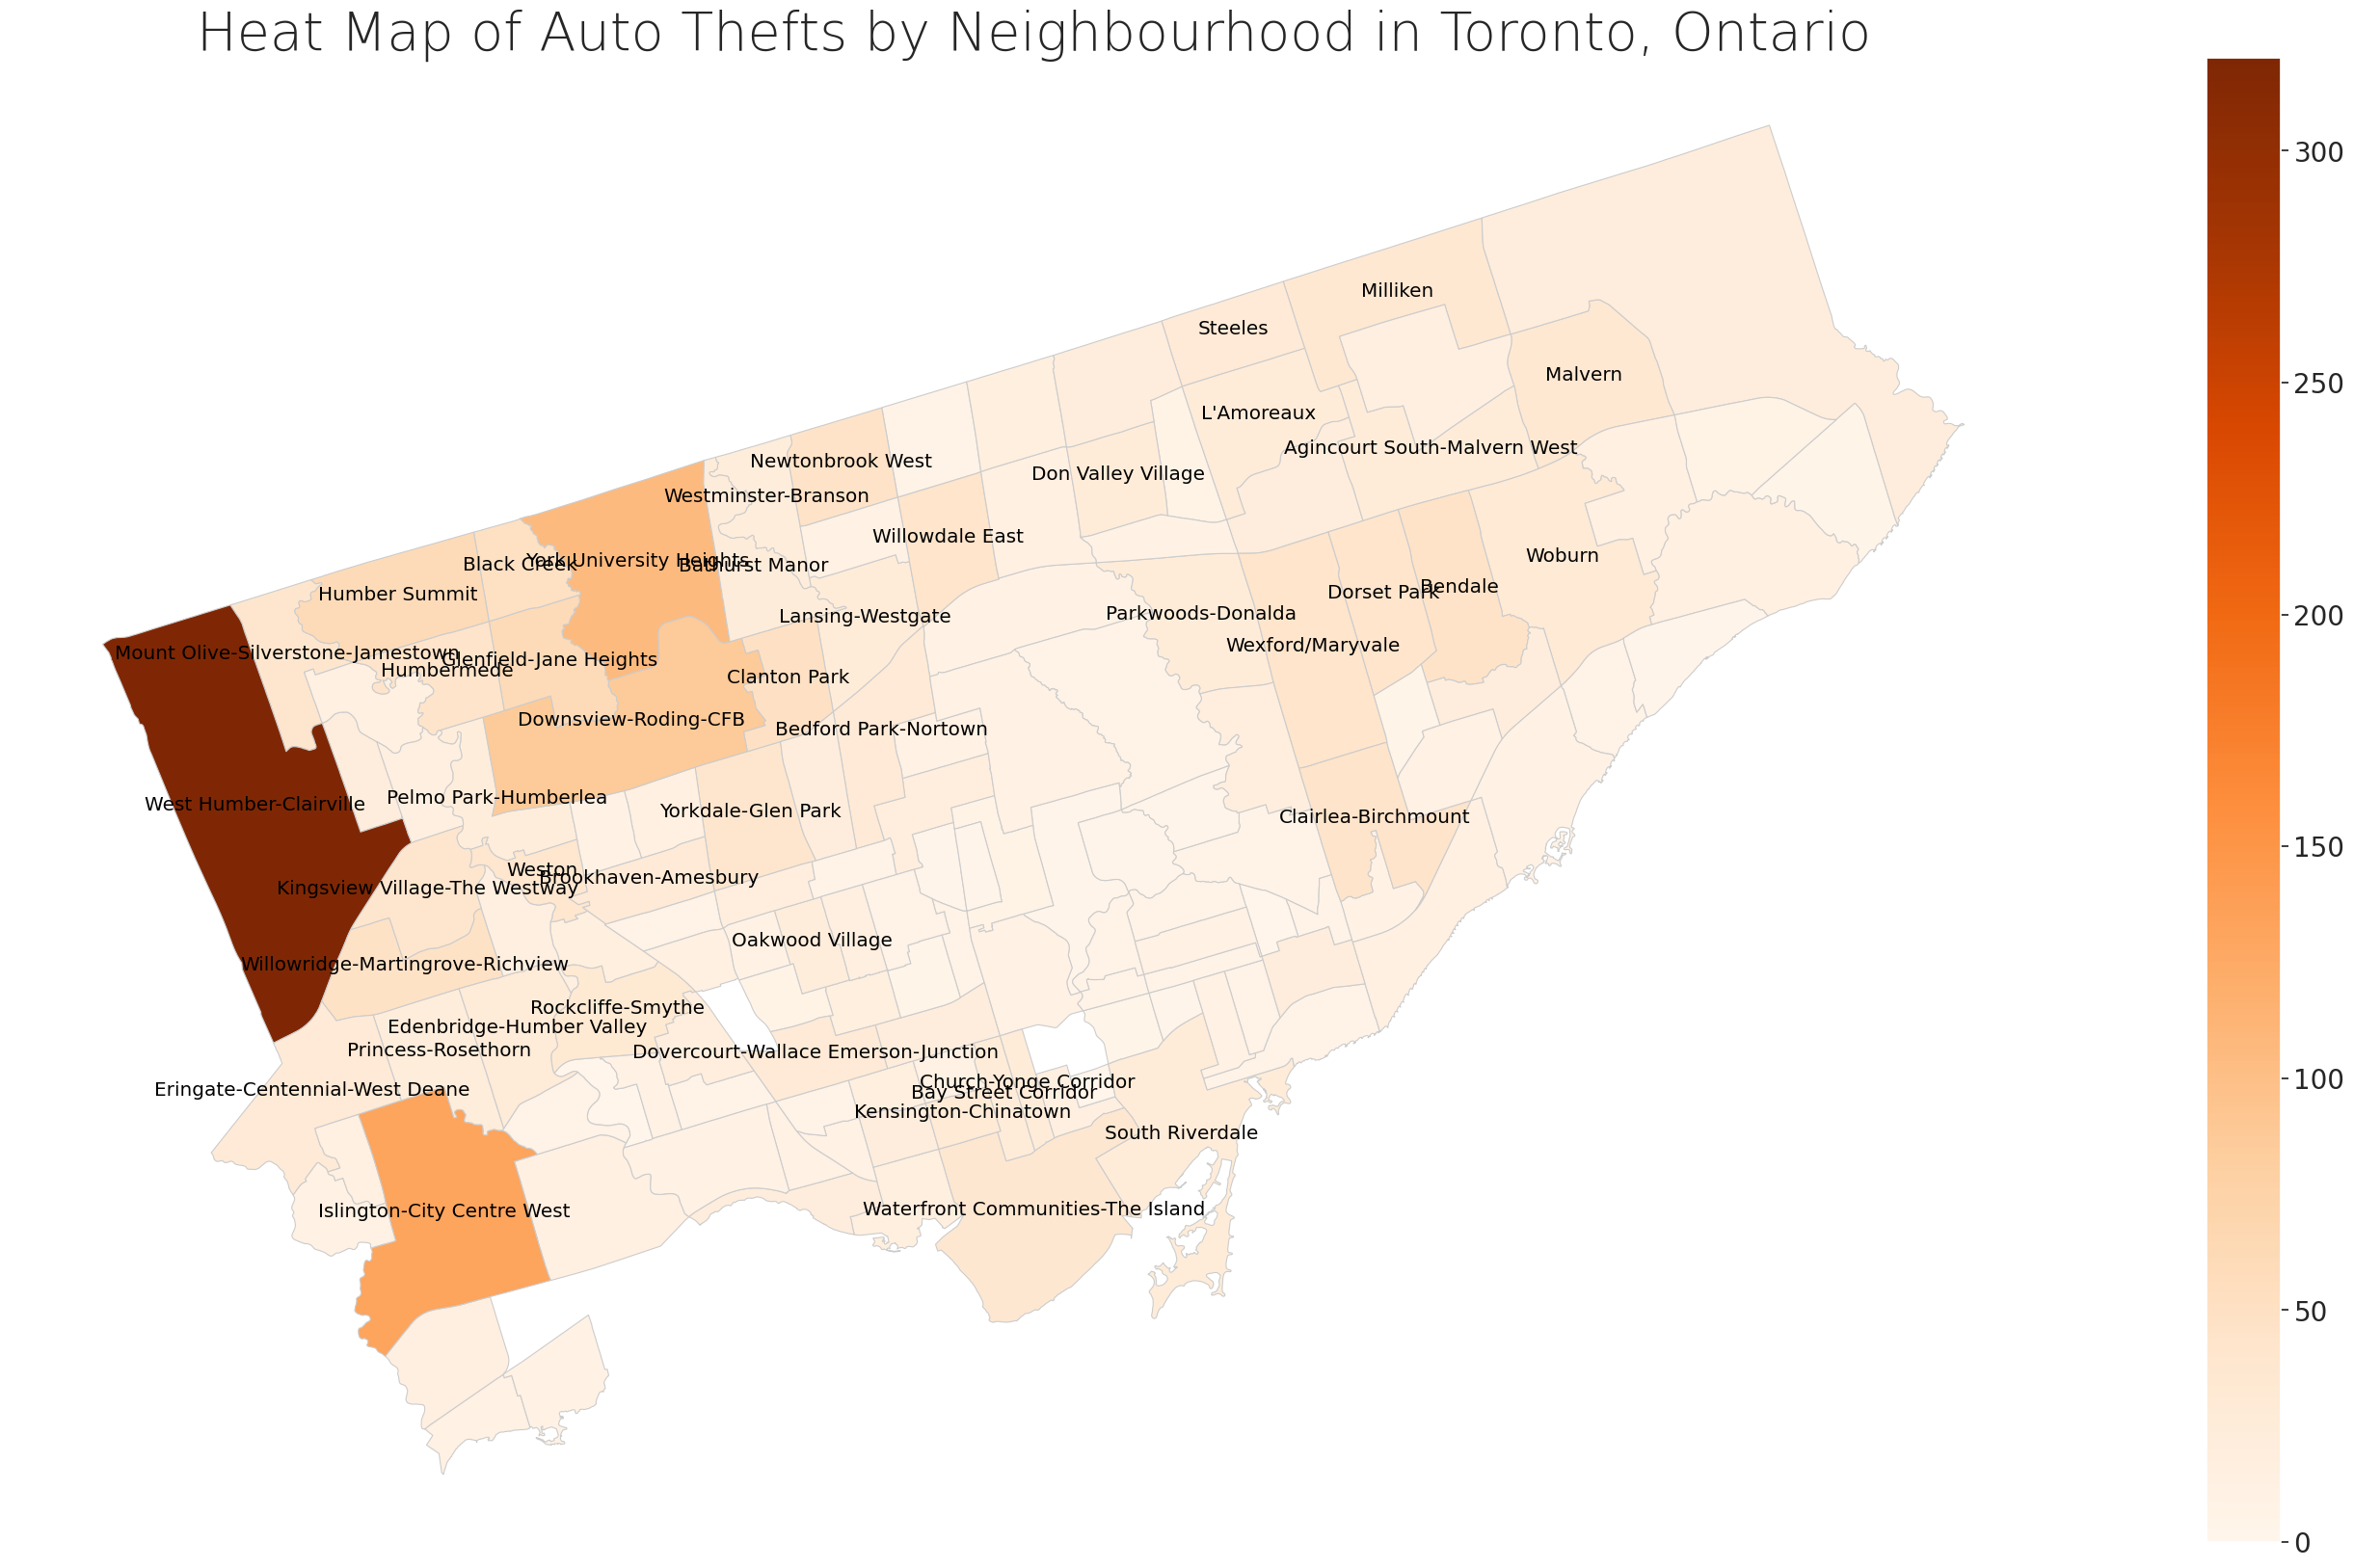

In [ ]:
%%capture --no-display
# Heat Map of Auto Thefts by Neighbourhood in Toronto

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Auto Thefts by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, crime_regions['AutoTheft_2016'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

crime_regions.plot('AutoTheft_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in crime_regions.iterrows():
    if(row['AutoTheft_2016'] > crime_regions['AutoTheft_2016'].mean()):
        plt.annotate(text=row['neighbourhood'], xy=(row['longitute'], row['latitude']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

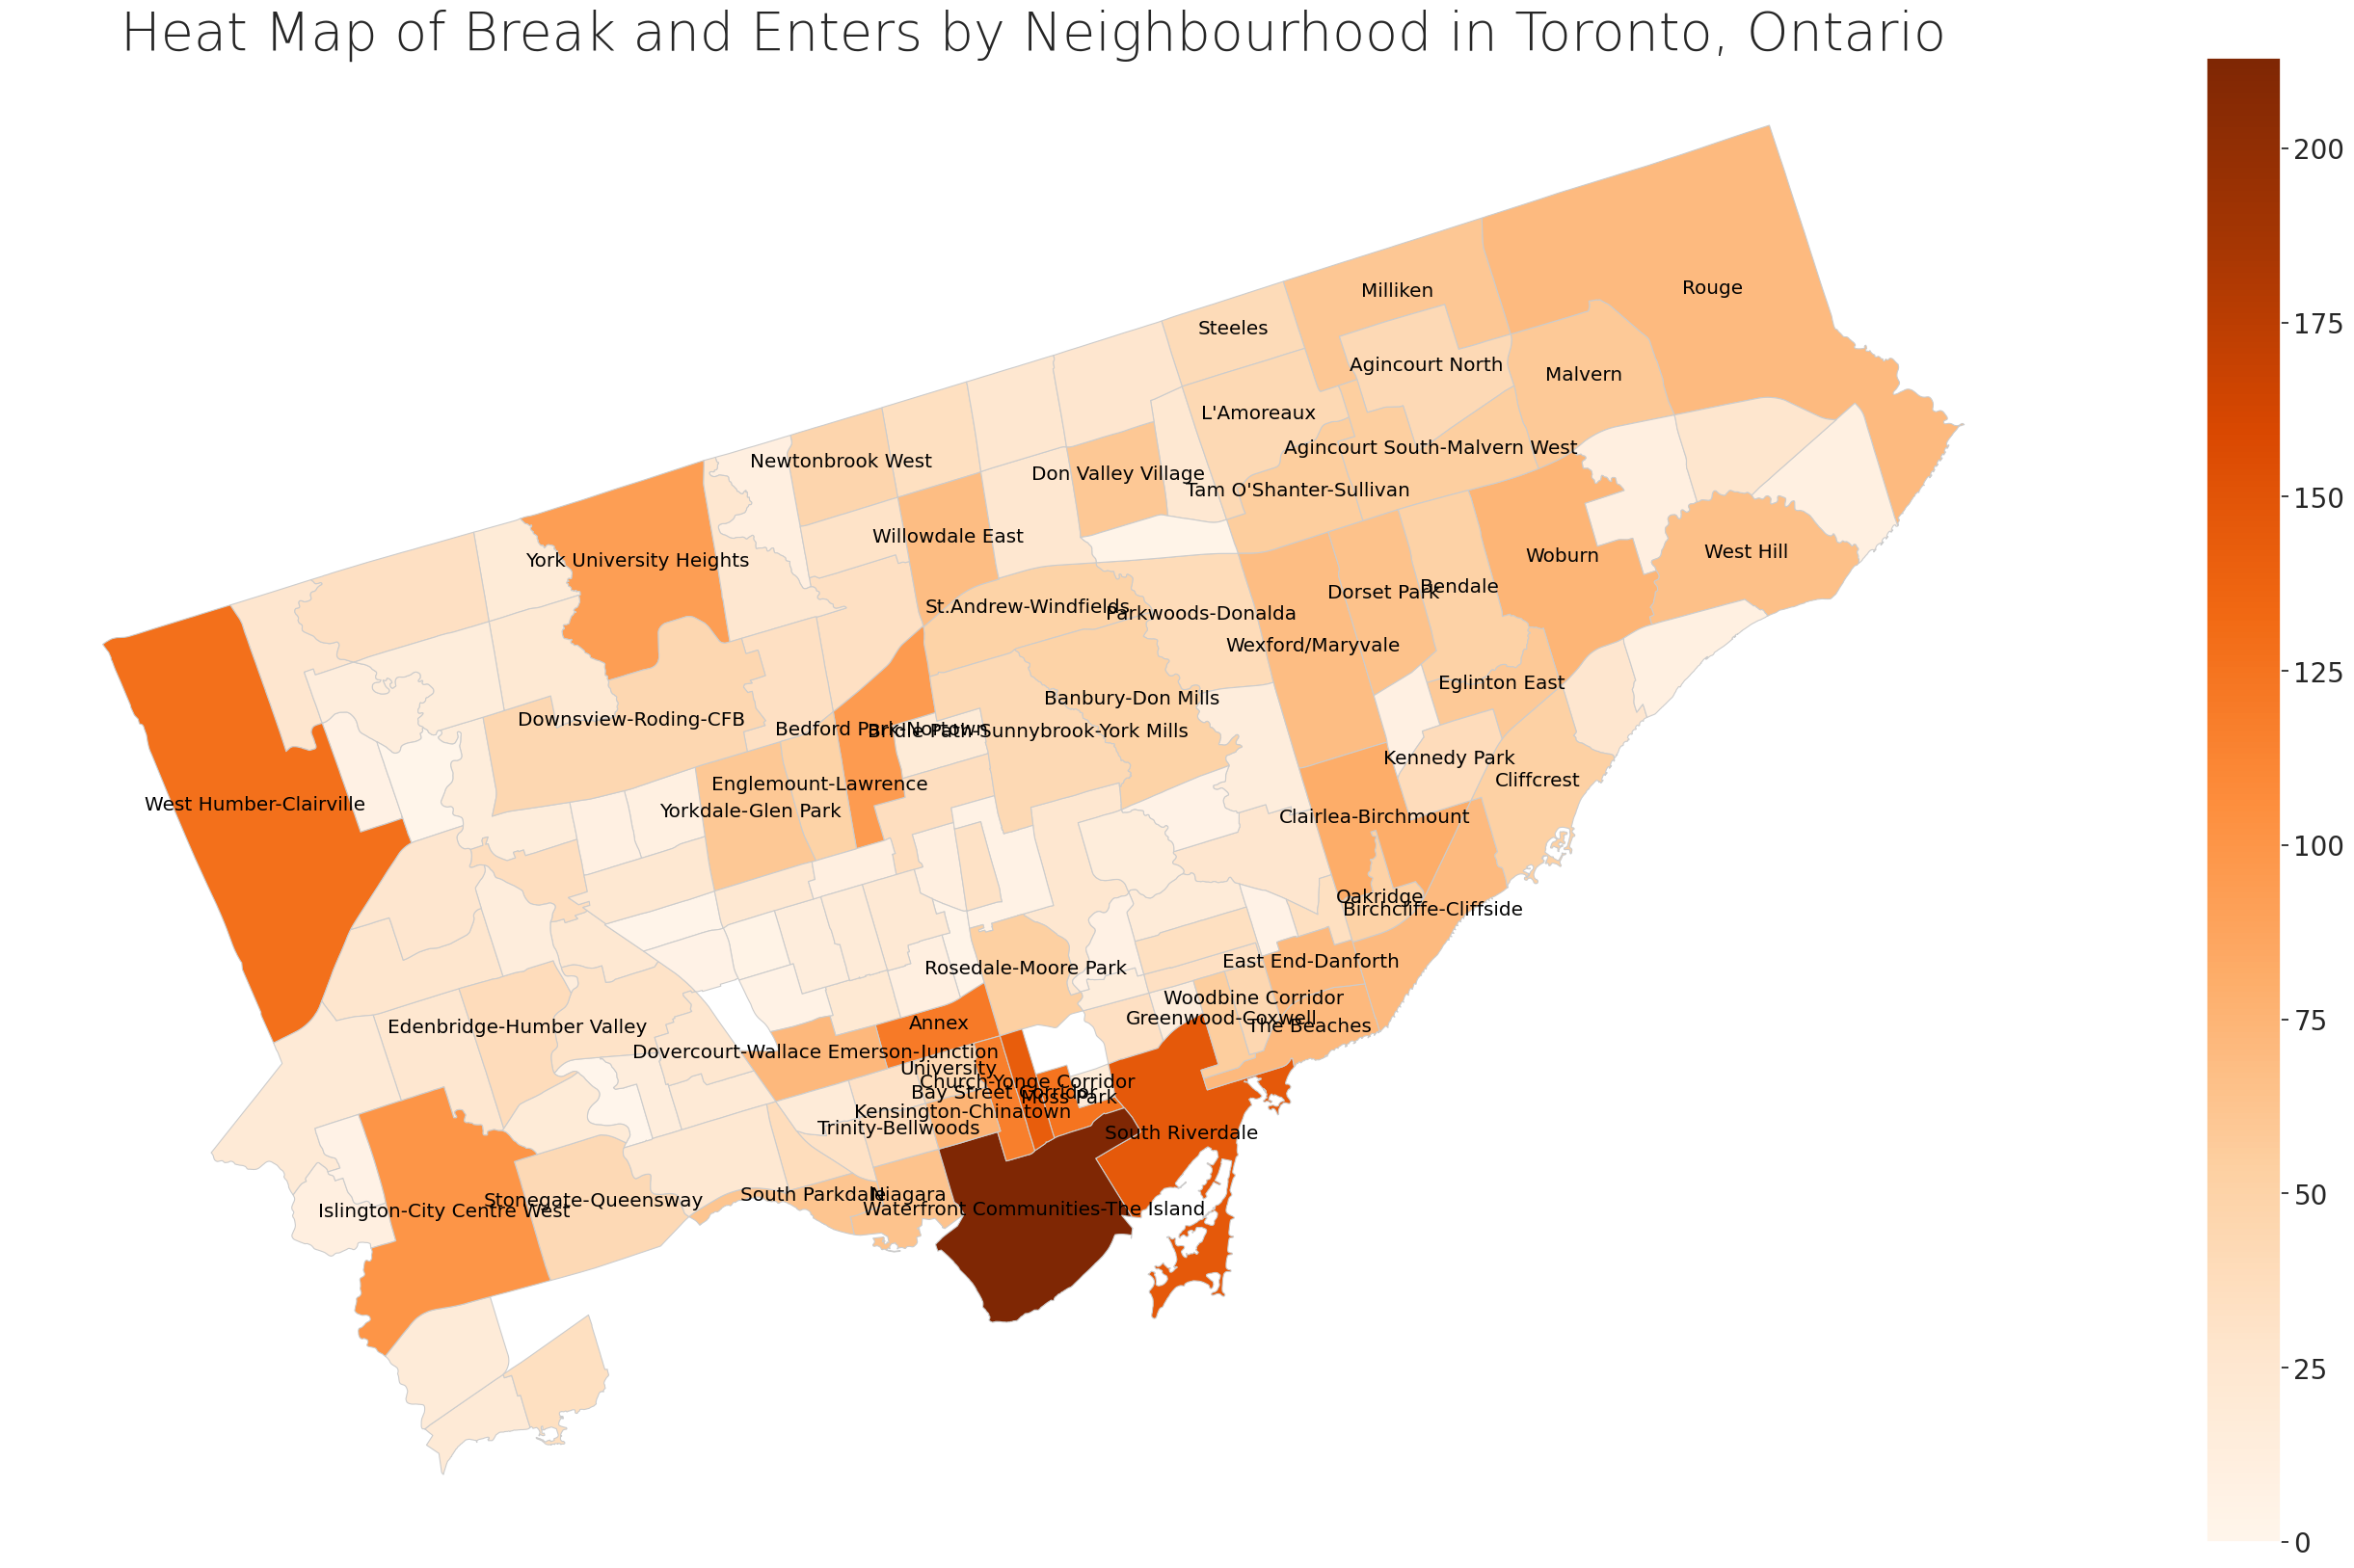

In [ ]:
%%capture --no-display
# Heat Map of Break and Enters by Neighbourhood in Toronto

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Break and Enters by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, crime_regions['BreakAndEnter_2016'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

crime_regions.plot('BreakAndEnter_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in crime_regions.iterrows():
    if(row['BreakAndEnter_2016'] > crime_regions['BreakAndEnter_2016'].mean()):
        plt.annotate(text=row['neighbourhood'], xy=(row['longitute'], row['latitude']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

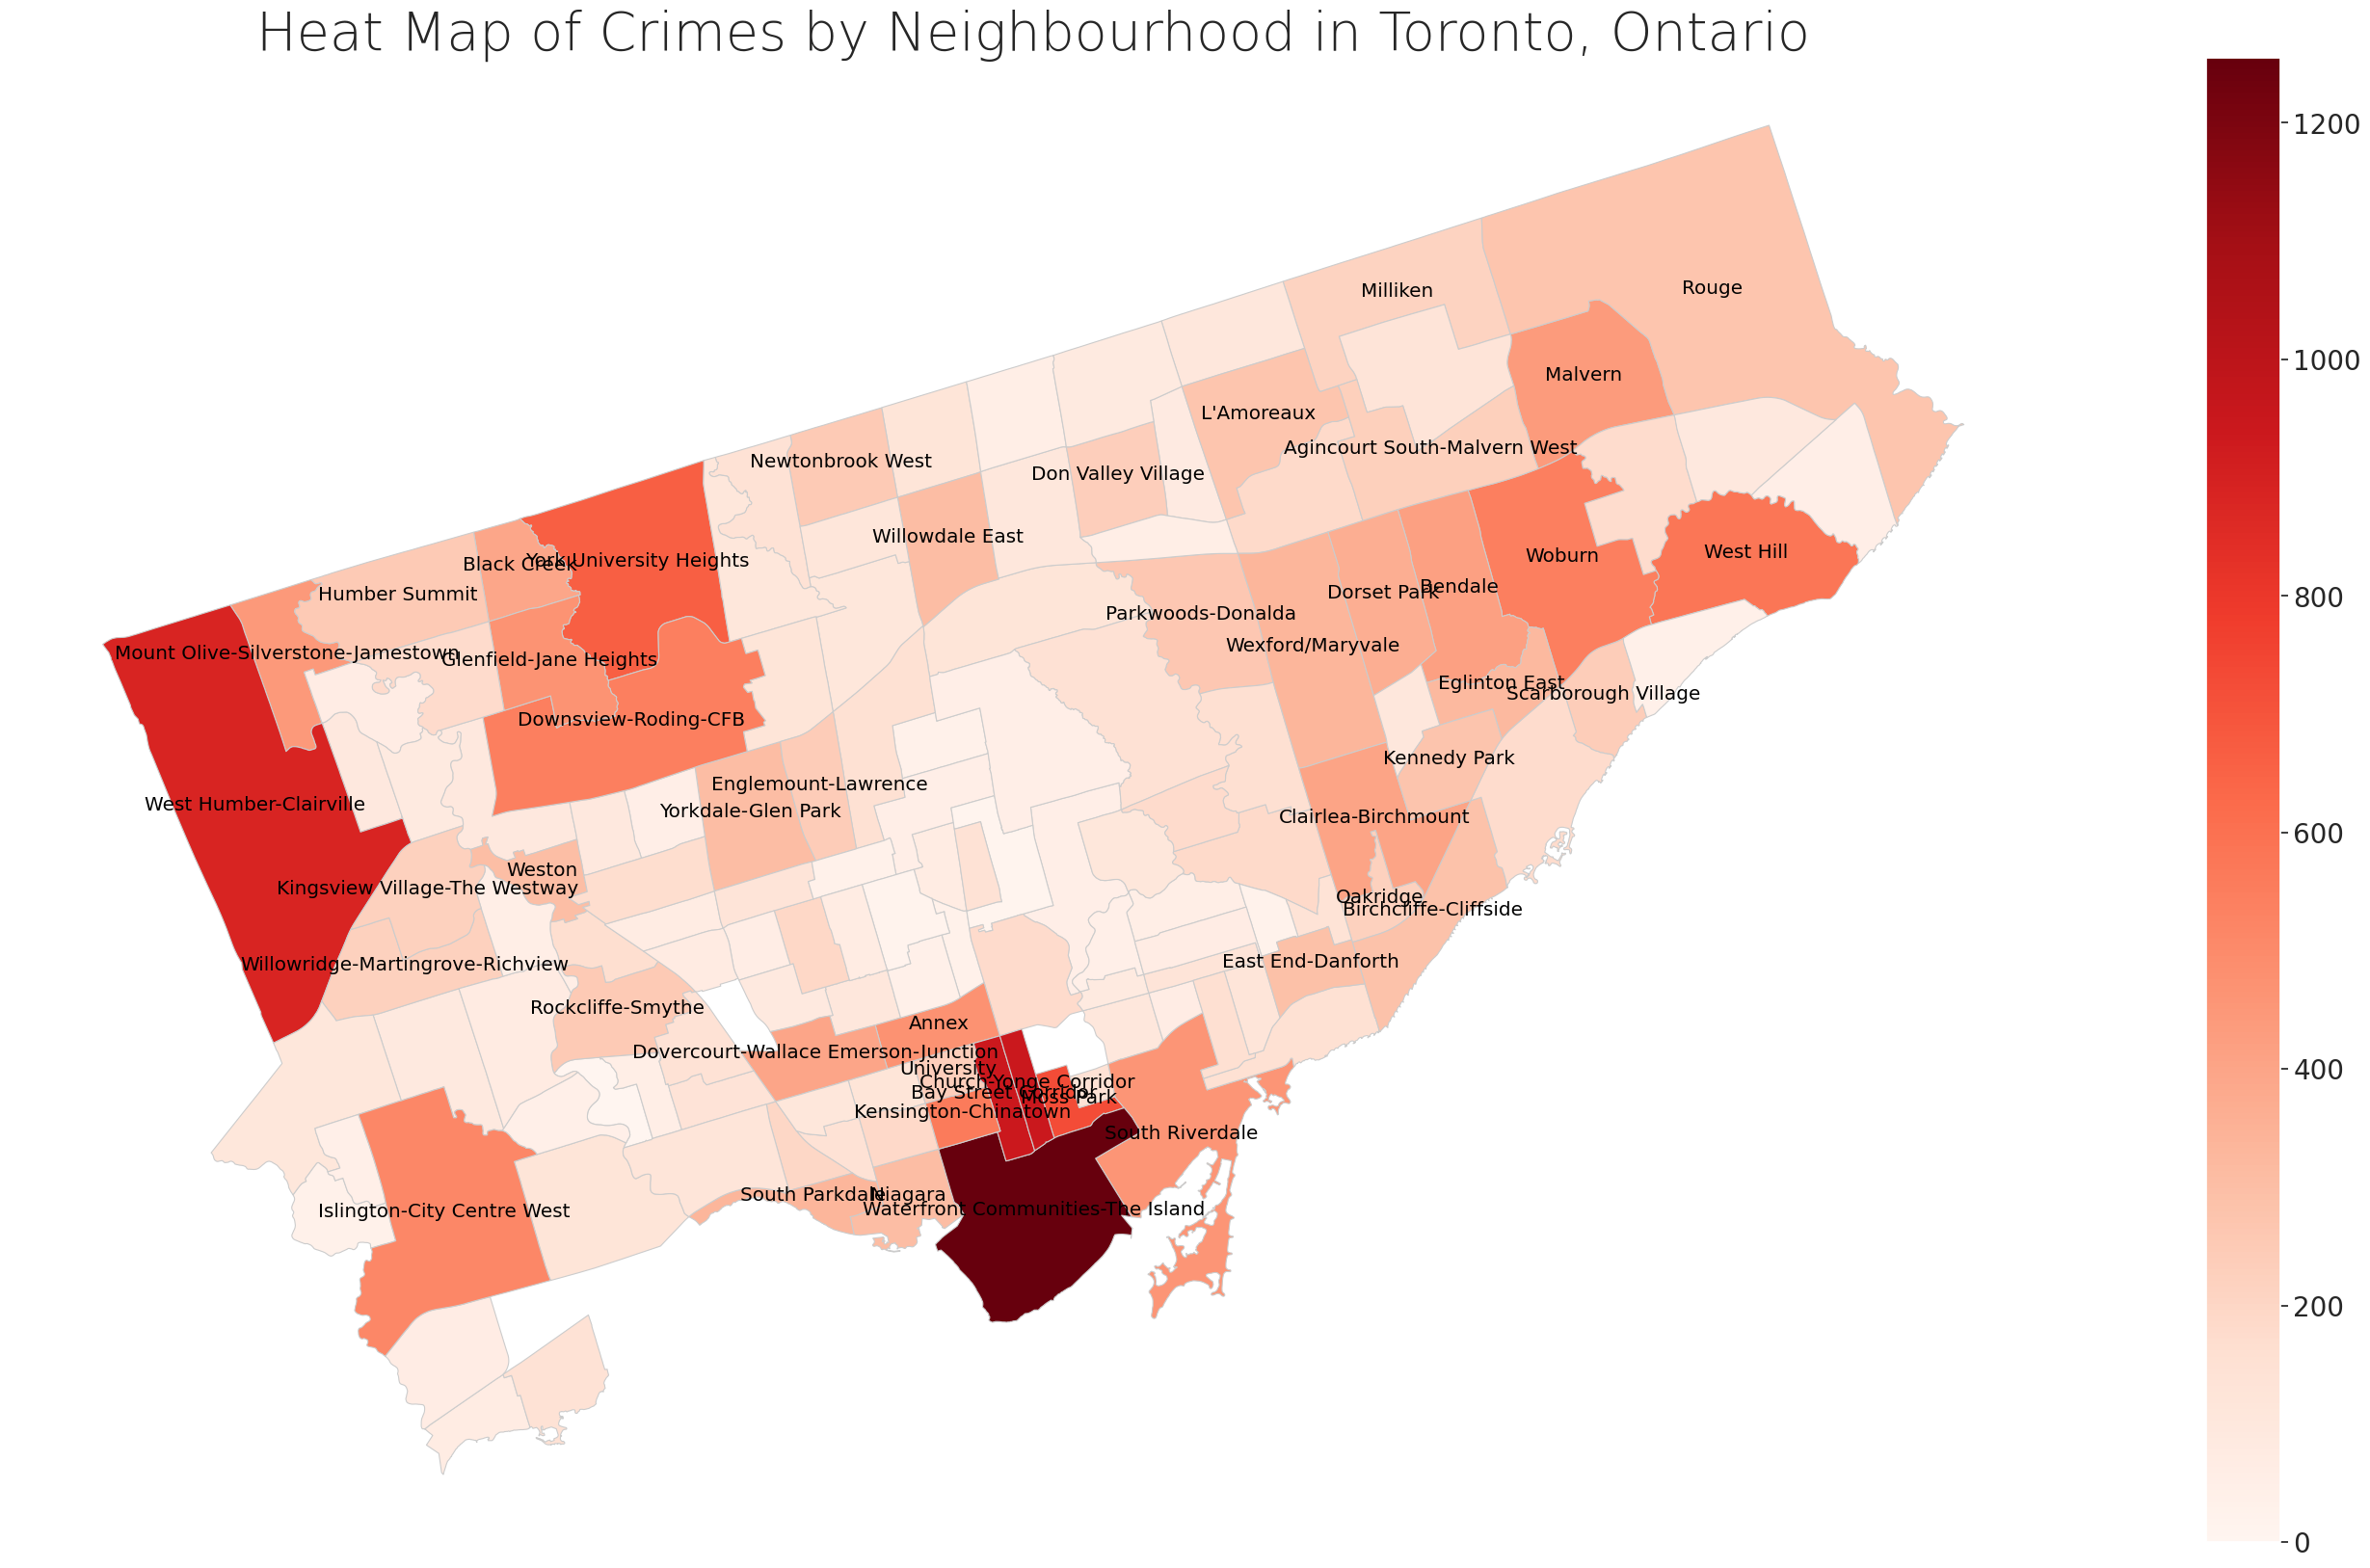

In [ ]:
%%capture --no-display
# Heat Map of Crimes by Neighbourhood in Toronto
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Crimes by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

#color = 'Oranges'
color = 'Reds'
vmin, vmax = 0, crime_regions['TotalCrimes_2016'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

crime_regions.plot('TotalCrimes_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in crime_regions.iterrows():
    if(row['TotalCrimes_2016'] > crime_regions['TotalCrimes_2016'].mean()):
        plt.annotate(text=row['neighbourhood'], xy=(row['longitute'], row['latitude']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

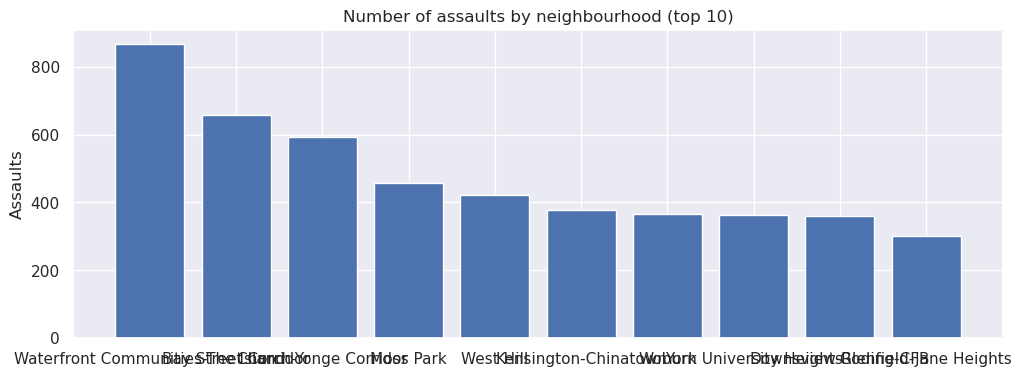

In [ ]:
# assaults top 10 bar graph
crime_regions = crime_regions.sort_values(['Assault_2016'], ascending=False)

fig, ax = plt.subplots()

ax.bar(crime_regions['neighbourhood'].iloc[:10], crime_regions['Assault_2016'].iloc[:10])

ax.set_ylabel('Assaults')
ax.set_title('Number of assaults by neighbourhood (top 10)')

plt.show()

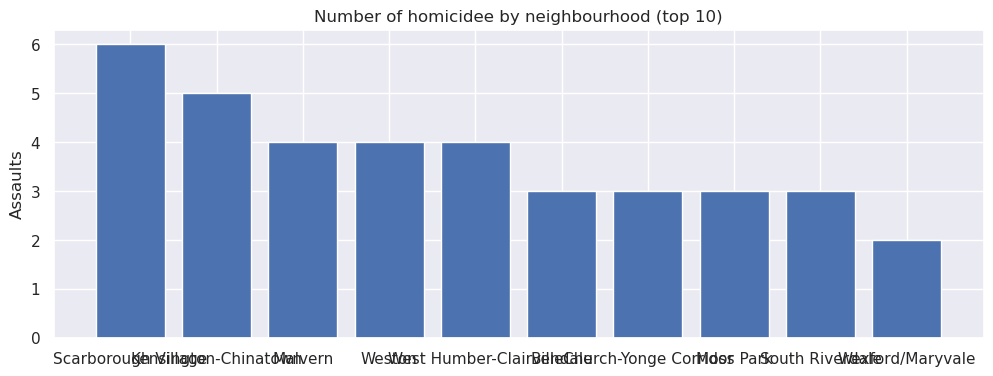

In [ ]:
# homicides
crime_regions = crime_regions.sort_values(['Homicide_2016'], ascending=False)

fig, ax = plt.subplots()
ax.bar(crime_regions['neighbourhood'].iloc[:10], crime_regions['Homicide_2016'].iloc[:10])
ax.set_ylabel('Assaults')
ax.set_title('Number of homicidee by neighbourhood (top 10)')

plt.show()

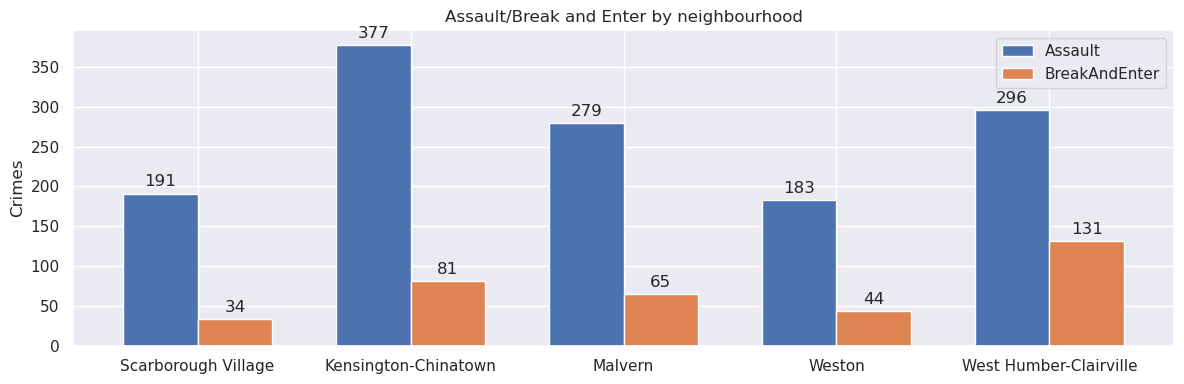

In [ ]:
plt.rc('figure', figsize=(12, 4))

x = np.arange(len(crime_regions['neighbourhood'].iloc[:5]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

#rects1 = ax.bar(x - width/2, men_means, width, label='Men')
assault = ax.bar(x - width/2, crime_regions['Assault_2016'].iloc[:5], width, label='Assault')
homicide = ax.bar(x + width/2, crime_regions['BreakAndEnter_2016'].iloc[:5], width, label='BreakAndEnter')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crimes')
ax.set_title('Assault/Break and Enter by neighbourhood')
ax.set_xticks(x, crime_regions['neighbourhood'].iloc[:5])
ax.legend()

ax.bar_label(assault, padding=3)
ax.bar_label(homicide, padding=3)

fig.tight_layout()

plt.show()

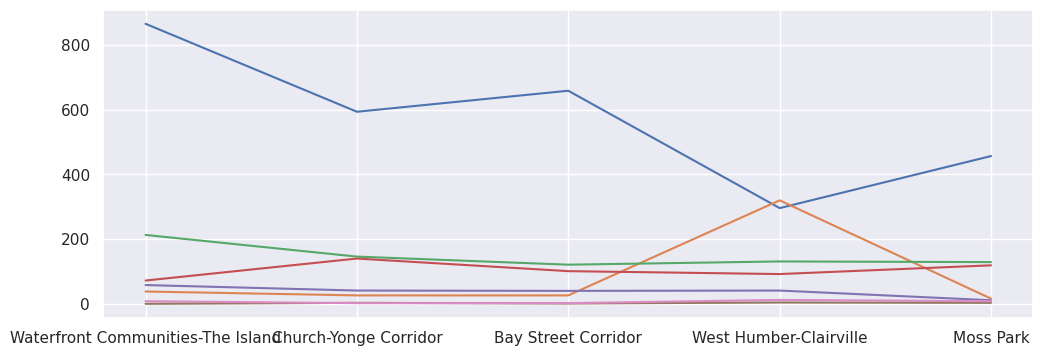

In [ ]:
crime_regions = crime_regions.sort_values(['TotalCrimes_2016'], ascending=False)

plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['Assault_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['AutoTheft_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['BreakAndEnter_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['Robbery_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['TheftOver_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['Homicide_2016'].iloc[:5])
plt.plot(crime_regions['neighbourhood'].iloc[:5],crime_regions['Shootings_2016'].iloc[:5])


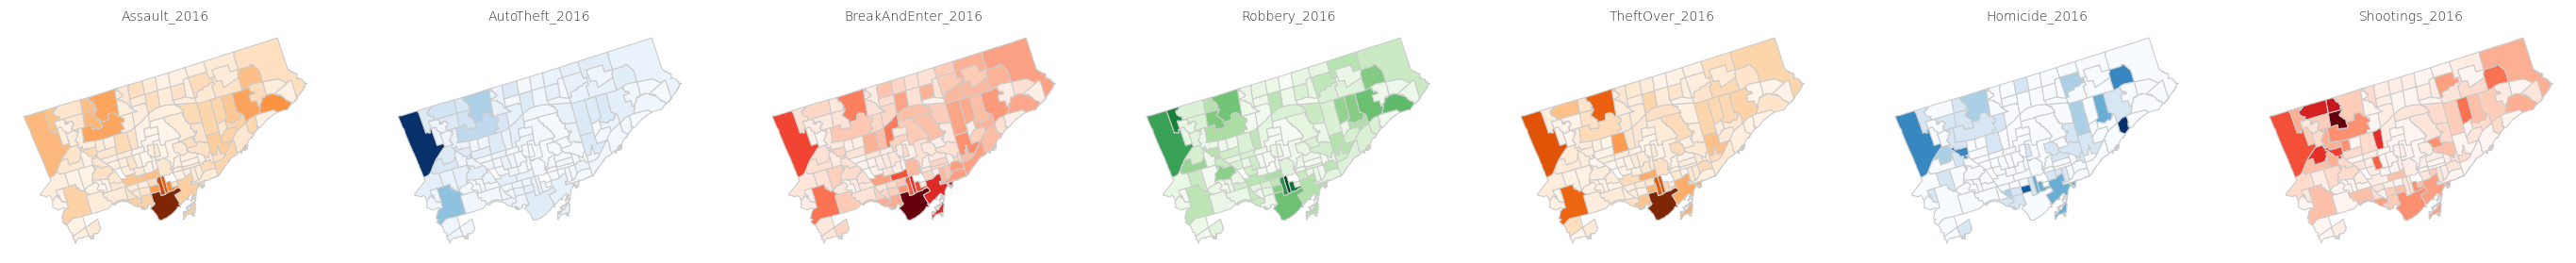

In [ ]:
%%capture --no-display
# make smaller plots so we can visually compare them
crimes_of_interest_column_names = ["Assault_2016", "AutoTheft_2016", "BreakAndEnter_2016", "Robbery_2016", "TheftOver_2016", "Homicide_2016", "Shootings_2016"]
#colors = plt.cm.Sequential
colors = ["Oranges", "Blues", "Reds", "Greens"]

fig_width = 5
fig_height = 5

# make the plots
fig, axs = plt.subplots(ncols=len(crimes_of_interest_column_names), figsize=(fig_width * len(crimes_of_interest_column_names), fig_height))
# common settings for all plots:
for ax in axs:
    ax.axis('off')

# unique settings:
for i in range(0, len(crimes_of_interest_column_names)):
    crime_column = crimes_of_interest_column_names[i]
    #todo: fix title crime name
    axs[i].set_title(f"{crime_column}", fontdict={'fontsize': '10', 'fontweight' : '3'})

    color = colors[i % len(colors)]
    vmin, vmax = 0, crime_regions[crime_column].max()
    scalar_mappable = mpltlib.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=color)
    
    #cbar = fig.colorbar(scalar_mappable)
    #cbar.ax.tick_params(labelsize=14)

    crime_regions.plot(crime_column, cmap=color, linewidth=0.8, ax=axs[i], edgecolor='0.8', figsize=(fig_width, fig_height))

    
plt.show()
    
#####################
discard = '''
# make the plot
fig, ax = plt.subplots(1, figsize=(10,5))
ax.axis('off')
ax.set_title('Heat Map of Unemployment', fontdict={'fontsize': '10', 'fontweight' : '3'})

color = 'Blues'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Assault_2016', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(10,5))

plt.show()
'''

In [ ]:
# Unpivot the crime dataframe
crime_years = pd.melt(crime_raw, id_vars=['OBJECTID','Neighbourhood','Hood_ID','F2020_Population_Projection','Shape__Area','Shape__Length'])


In [ ]:
# adjust the variable column to split
crime_years['variable'] = crime_years['variable'].str.replace('_Rate', 'Rate_')


In [ ]:
# split variable column into crime_type and year
crime_years[['crime_type','year']] = crime_years['variable'].str.split('_', expand=True)


In [ ]:
# remove columns that are not used
crime_years = crime_years.drop('OBJECTID', axis=1)
crime_years = crime_years.drop('Hood_ID', axis=1)
crime_years = crime_years.drop('F2020_Population_Projection', axis=1)
crime_years = crime_years.drop('Shape__Area', axis=1)
crime_years = crime_years.drop('Shape__Length', axis=1)
crime_years = crime_years.drop('variable', axis=1)


In [ ]:
crime_years

,Neighbourhood,value,crime_type,year
0,Yonge-St.Clair,16.000000,Assault,2014
1,York University Heights,273.000000,Assault,2014
2,Lansing-Westgate,42.000000,Assault,2014
3,Yorkdale-Glen Park,106.000000,Assault,2014
4,Stonegate-Queensway,91.000000,Assault,2014
...,...,...,...,...
13715,Pleasant View,1.186521,ShootingsRate,2020
13716,Wychwood,1.247116,ShootingsRate,2020
13717,Leaside-Bennington,0.000000,ShootingsRate,2020
13718,Briar Hill-Belgravia,0.647333,ShootingsRate,2020
